In [49]:
#importing essential libraries
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils import data
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.utils import save_image
import math 
import os
import matplotlib.pyplot as plt
import numpy as np 

In [50]:
# Define discriminator neural network
class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super().__init__()
        self.img_dim = img_dim
        self.disc = nn.Sequential(
            nn.Linear(img_dim, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.disc(x)

In [51]:

# Define generator neural network
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.z_dim = z_dim
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, img_dim),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.gen(x)

In [52]:
# Hyperparameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 3e-4
z_dim = 64
img_dim = 28*28
batch_size = 32
num_epochs = 100


In [53]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

(-0.5, 241.5, 121.5, -0.5)

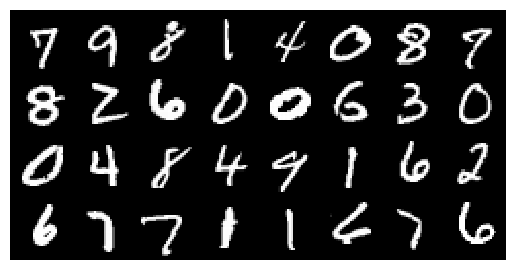

In [54]:
import matplotlib.pyplot as plt
import numpy as np

it = iter(train_loader)
real_sample = next(iter(train_loader))[0]
img_grid_real = torchvision.utils.make_grid(real_sample, normalize=True)
npgrid = img_grid_real.cpu().numpy()
plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
plt.axis('off')

In [55]:
disc = Discriminator(img_dim).to(device)
gen = Generator(z_dim, img_dim).to(device)
optim_disc = optim.Adam(disc.parameters(), lr=lr)
optim_gen = optim.Adam(gen.parameters(), lr=lr)

In [56]:
criterion = nn.BCELoss()
loss = nn.MSELoss()

In [57]:
# Train the GAN
gen_loss = []
dis_loss = []
for epoch in range(num_epochs):
    total_loss = 0
    for batch_idx, (real, _) in enumerate(train_loader):
        real = real.view(-1, img_dim).to(device)
        batch_size = real.shape[0]
        
        # Train discriminator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake.detach()).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        optim_disc.step()
        
        # Train generator
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        
        gen.zero_grad()
        lossG.backward()
        optim_gen.step()
        fake1 = gen(noise).reshape(-1, 1, 28, 28)
        total_loss += loss(real,fake)
        # Print losses
        if batch_idx == 0:
            gen_loss.append(lossG)
            dis_loss.append(lossD)
            print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(train_loader)} \
                  Loss D: {lossD:.4f}, Loss G: {lossG:.4f}")
    print(f"loss at Epoch-{epoch}: {total_loss/1875}")

Epoch [0/100] Batch 0/1875                   Loss D: 0.7233, Loss G: 0.6871
loss at Epoch-0: 0.4349533021450043
Epoch [1/100] Batch 0/1875                   Loss D: 0.4447, Loss G: 1.3018
loss at Epoch-1: 0.3075648248195648
Epoch [2/100] Batch 0/1875                   Loss D: 0.3217, Loss G: 1.4344
loss at Epoch-2: 0.30945634841918945
Epoch [3/100] Batch 0/1875                   Loss D: 0.5534, Loss G: 1.2225
loss at Epoch-3: 0.3423795998096466
Epoch [4/100] Batch 0/1875                   Loss D: 0.4893, Loss G: 1.7807
loss at Epoch-4: 0.37204742431640625
Epoch [5/100] Batch 0/1875                   Loss D: 0.5114, Loss G: 1.4692
loss at Epoch-5: 0.37591972947120667
Epoch [6/100] Batch 0/1875                   Loss D: 0.4892, Loss G: 1.1966
loss at Epoch-6: 0.3973380923271179
Epoch [7/100] Batch 0/1875                   Loss D: 0.4347, Loss G: 1.7348
loss at Epoch-7: 0.43038368225097656
Epoch [8/100] Batch 0/1875                   Loss D: 0.6440, Loss G: 0.9700
loss at Epoch-8: 0.42854

loss at Epoch-72: 0.5143833160400391
Epoch [73/100] Batch 0/1875                   Loss D: 0.5730, Loss G: 0.9660
loss at Epoch-73: 0.5150488615036011
Epoch [74/100] Batch 0/1875                   Loss D: 0.5800, Loss G: 0.9638
loss at Epoch-74: 0.5147916078567505
Epoch [75/100] Batch 0/1875                   Loss D: 0.6564, Loss G: 0.8578
loss at Epoch-75: 0.5151669979095459
Epoch [76/100] Batch 0/1875                   Loss D: 0.6008, Loss G: 0.8780
loss at Epoch-76: 0.51534104347229
Epoch [77/100] Batch 0/1875                   Loss D: 0.5856, Loss G: 1.1009
loss at Epoch-77: 0.515741229057312
Epoch [78/100] Batch 0/1875                   Loss D: 0.6305, Loss G: 0.9356
loss at Epoch-78: 0.5153221487998962
Epoch [79/100] Batch 0/1875                   Loss D: 0.6735, Loss G: 0.9969
loss at Epoch-79: 0.5152104496955872
Epoch [80/100] Batch 0/1875                   Loss D: 0.6720, Loss G: 0.9377
loss at Epoch-80: 0.5159193277359009
Epoch [81/100] Batch 0/1875                   Loss D: 

In [58]:
Gloss = []
Dloss = []
loss_g = 0
loss_d = 0
for ele in gen_loss:
    Gloss.append(ele.item())
    loss_g+=ele.item()
print(loss_g/num_epochs)
for ele in dis_loss:
    Dloss.append(ele.item())
    loss_d+=ele.item()
print(loss_d/num_epochs)

0.9979957067966461
0.6192205682396889


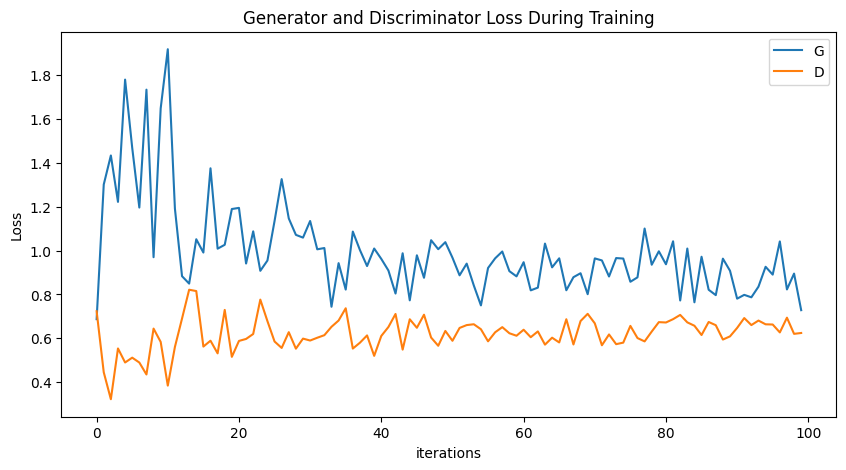

In [59]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(Gloss,label="G")
plt.plot(Dloss,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

(-0.5, 241.5, 121.5, -0.5)

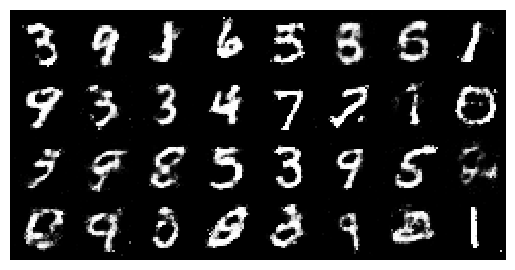

In [60]:
fake = gen(noise).reshape(-1, 1, 28, 28)
img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
npgrid = img_grid_fake.cpu().numpy()
plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
plt.axis('off')